In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test)= keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


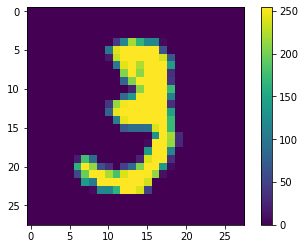

In [4]:
plt.figure()
plt.imshow(X_train[10])
plt.colorbar()
plt.show()

In [5]:
X_train = X_train.reshape(-1,28,28,1)
X_test  = X_test.reshape(-1,28,28,1)
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


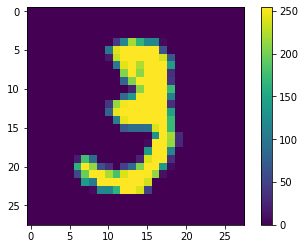

In [6]:
plt.figure()
plt.imshow(X_train[10,:, :, 0])
plt.colorbar()
plt.show()

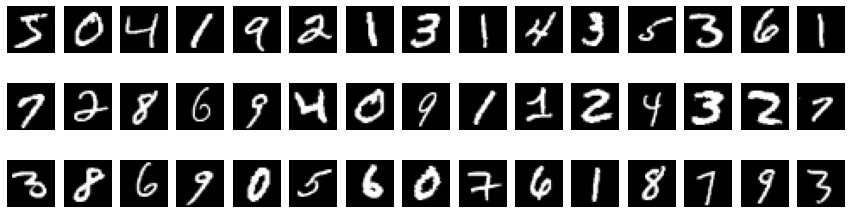

In [7]:
fig, axes = plt.subplots(3, 15, figsize=(15,4))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i,:,:,0], cmap="gray")
    #ax.set_title(f"Label: {y_train[i]}")
    ax.axis("off")

plt.show()

In [16]:

 model = keras.models.Sequential()

 model.add( keras.layers.Input((28,28,1)) )

 model.add( keras.layers.Conv2D(8, (3,3),  activation='relu') )
 model.add( keras.layers.MaxPooling2D((2,2)))
 model.add( keras.layers.Dropout(0.2))

 model.add( keras.layers.Conv2D(16, (3,3), activation='relu') )
 model.add( keras.layers.MaxPooling2D((2,2)))
 model.add( keras.layers.Dropout(0.2))

 model.add( keras.layers.Flatten()) 
 model.add( keras.layers.Dense(100, activation='relu'))
 model.add( keras.layers.Dropout(0.5))

 model.add( keras.layers.Dense(10, activation='softmax'))

In [17]:
#DISPLAY model summary
model. summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 8)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 8)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 16)          0

In [18]:
#compile
model.compile(loss='SparseCategoricalCrossentropy', optimizer='adam', metrics=["accuracy"])

In [20]:
#train model
history = model.fit(X_train, y_train, epochs=10,batch_size=64, validation_split=0.1)

Epoch 1/10
844/844 [==============================] - 6s 7ms/step - loss: 3.6544 - accuracy: 0.2898 - val_loss: 1.0673 - val_accuracy: 0.6485
Epoch 2/10
844/844 [==============================] - 6s 7ms/step - loss: 1.3713 - accuracy: 0.5140 - val_loss: 0.4857 - val_accuracy: 0.8505
Epoch 3/10
844/844 [==============================] - 6s 7ms/step - loss: 0.9569 - accuracy: 0.6667 - val_loss: 0.2562 - val_accuracy: 0.9507
Epoch 4/10
844/844 [==============================] - 8s 9ms/step - loss: 0.6524 - accuracy: 0.7812 - val_loss: 0.1441 - val_accuracy: 0.9622
Epoch 5/10
844/844 [==============================] - 8s 9ms/step - loss: 0.4682 - accuracy: 0.8549 - val_loss: 0.1073 - val_accuracy: 0.9717
Epoch 6/10
844/844 [==============================] - 8s 9ms/step - loss: 0.3623 - accuracy: 0.8905 - val_loss: 0.0841 - val_accuracy: 0.9745
Epoch 7/10
844/844 [==============================] - 8s 9ms/step - loss: 0.2937 - accuracy: 0.9114 - val_loss: 0.0727 - val_accuracy: 0.9790
Epoch 

In [25]:
#display score, accuracy
print("\nEvaluating...", flush=True)
print('Training data:', flush=True)
loss, acc = model.evaluate(X_train, y_train, verbose=0)
print("  Training : loss %.3f - acc %.3f" % (loss, acc))
# print('Validation data:', flush=True)
#     loss, acc = model.evaluate(X_val, y_val, verbose=0)
#     print("  Validation: loss %.3f - acc %.3f" % (loss, acc))
print('Test data:', flush=True)
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print("  Testing  : loss %.3f - acc %.3f" % (loss, acc))


Evaluating...
Training data:
  Training : loss 0.062 - acc 0.981
Test data:
  Testing  : loss 0.060 - acc 0.981


In [13]:
#plot training and validation Accuracy
#plot training and validation loss

In [14]:
#prediction

In [15]:
#display model errors
